### DASC521: Intro to ML
### Homework 4: Nonparametric Regression
### Gamze Keçibaş 60211  
---
### CONTENT
- **Step 01.** Import libraries    
- **Step 02.** Import dataset & Data preparation      
- **Step 03.** Regressogram      
- **Step 04.** Running Mean Smoother    
- **Step 05.** Kernel Smoother
- **Step 06.** Plotting  
- **Step 07.** Error Calculation by RMSE  

* **Step 01.** Import libraries

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

- **Step 02.** Import dataset & Data preparation

In [2]:
DS= np.genfromtxt('hw04_data_set.csv',delimiter=',')
DS= np.delete(DS, (0), axis=0)

train_data= DS[:150,0].reshape(150,1)
train_label= DS[:150,1].reshape(150,1)
test_data= DS[150:,0].reshape(122,1)
test_label= DS[150:,1].reshape(122,1)

print('Size of given dataset: ', DS.shape)
print('First five rows: ')
print(DS[0:5])
print('Size of training data: ', train_data.shape)
print('First five rows: ')
print(train_data[0:5])
print('Size of training labels: ', train_label.shape)
print('First five rows: ')
print(train_label[0:5])
print('Size of test data: ', test_data.shape)
print('Size of test label: ', test_label.shape)


K = np.max(train_label)
N = DS.shape[0]

bin_width = 0.37
origin = 1.5

left_borders = np.arange( min(train_data), max(train_data), bin_width)
right_borders = np.arange(min(train_data) + bin_width, max(train_data) + bin_width, bin_width)
data_interval = np.arange(0,60, 0.001)

Size of given dataset:  (272, 2)
First five rows: 
[[ 3.6   79.   ]
 [ 1.8   54.   ]
 [ 3.333 74.   ]
 [ 2.283 62.   ]
 [ 4.533 85.   ]]
Size of training data:  (150, 1)
First five rows: 
[[3.6  ]
 [1.8  ]
 [3.333]
 [2.283]
 [4.533]]
Size of training labels:  (150, 1)
First five rows: 
[[79.]
 [54.]
 [74.]
 [62.]
 [85.]]
Size of test data:  (122, 1)
Size of test label:  (122, 1)


- **Step 03.** Regressogram     

In [3]:
def regressogram(train_data, train_label, left_borders):
    p_hat_reg= np.zeros(len(train_data))
    for b in range(len(left_borders)):
        p_hat_reg[b]= np.sum(((left_borders[b] < train_data) & \
                              (train_data <= right_borders[b]))*train_label) / np.sum((left_borders[b] < train_data) & \
                                                                                      (train_data <= right_borders[b]))
    return p_hat_reg
y_hat_reg= regressogram(train_data, train_label, left_borders)

- **Step 04.** Running Mean Smoother   

In [4]:
def mean_smoother(train_data, train_label,data_interval, bin_width):
    p_hat_rms = np.zeros(len(data_interval))
    counter = 0

    for x in range(train_data.shape[0]):
        p_hat_rms[counter] = np.sum((((x - 0.5 * bin_width) < train_data) & \
                                     (train_data <= (x + 0.5 * bin_width)))*train_label) / np.sum(((x - 0.5 * bin_width) < train_data) & \
                                                                                                  (train_data <= (x + 0.5 * bin_width)))
        counter += 1
    return p_hat_rms
y_hat_rms= mean_smoother(train_data, train_label,data_interval, bin_width)

<ipython-input-4-2ced59f6fe69>:6: RuntimeWarning: invalid value encountered in double_scalars
  p_hat_rms[counter] = np.sum((((x - 0.5 * bin_width) < train_data) & \


- **Step 05.** Kernel Smoother

In [5]:
def K(u):
    k= np.exp(-u**2/2)/np.sqrt(2*math.pi)
    return k

def kernel_smoother(train_data, train_label,data_interval, bin_width):
    p_hat_kernels = np.zeros(len(data_interval))

    for i in range(len(data_interval)):
        p_hat_kernels[i] = np.sum(K((data_interval[i] - train_data)/bin_width )*train_label) / np.sum(K((data_interval[i] - train_data)/bin_width ))
    return p_hat_kernels

y_hat_kernels= kernel_smoother(train_data, train_label,data_interval, bin_width)

<ipython-input-5-05ec9098a684>:9: RuntimeWarning: invalid value encountered in double_scalars
  p_hat_kernels[i] = np.sum(K((data_interval[i] - train_data)/bin_width )*train_label) / np.sum(K((data_interval[i] - train_data)/bin_width ))


- **Step 06.** Plotting  

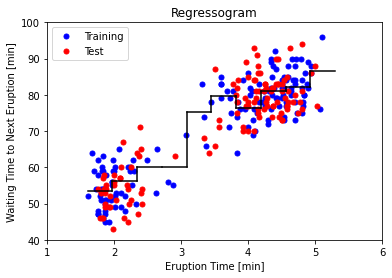

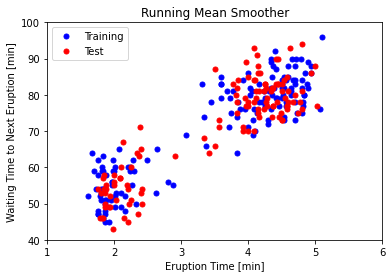

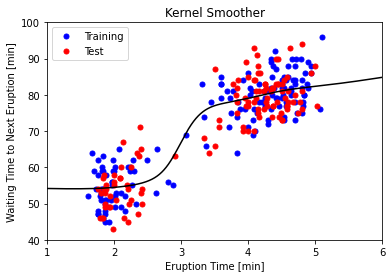

In [6]:
# Regressogram
plt.figure()
plt.plot(train_data,train_label,"b.", markersize = 10,label="Training")
plt.plot(test_data,test_label,"r.", markersize = 10,label="Test")
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [y_hat_reg[b], y_hat_reg[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [y_hat_reg[b], y_hat_reg[b + 1]], "k-")   

plt.xlabel("Eruption Time [min]")
plt.ylabel("Waiting Time to Next Eruption [min]")
plt.title("Regressogram")
plt.xlim([1,6]), plt.ylim([40, 100])
plt.legend()
plt.show()

# Running Mean Smoother
plt.figure()
plt.plot(train_data,train_label,"b.", markersize = 10,label="Training")
plt.plot(test_data,test_label,"r.", markersize = 10,label="Test")
plt.plot(data_interval, y_hat_rms, "k-")

plt.xlabel("Eruption Time [min]")
plt.ylabel("Waiting Time to Next Eruption [min]")
plt.title("Running Mean Smoother")
plt.xlim([1,6]), plt.ylim([40, 100])
plt.legend()
plt.show()

# Kernel Smoother
plt.figure()
plt.plot(train_data,train_label,"b.", markersize = 10,label="Training")
plt.plot(test_data,test_label,"r.", markersize = 10,label="Test")   
plt.plot(data_interval, y_hat_kernels, "k-")

plt.xlabel("Eruption Time [min]")
plt.ylabel("Waiting Time to Next Eruption [min]")
plt.title("Kernel Smoother")
plt.xlim([1,6]), plt.ylim([40, 100])
plt.legend()
plt.show()

- **Step 07.** Error Calculation by RMSE  

In [7]:
rms_nanmean= np.nanmean(y_hat_rms)
ind = np.where(np.isnan(y_hat_rms))
y_hat_rms[inds] = np.take(rms_nanmean, ind)

def RMSE(test_data, p_hat):
    loss=0
    
    for i in range(0,len(test_data)):
        for j in range(0,len(left_borders)):
            if(left_borders[j] < test_data[i] and test_data[i] <= right_borders[j]):
                err = (test_label[i] - p_hat[int((test_data[i]-origin)/bin_width)])**2
                loss += err
    res = np.sqrt(loss / len(test_data))
    return res
print("Regressogram => RMSE is", float(RMSE(test_data, y_hat_reg)), " when h is", bin_width)
print("Mean Smoother  => RMSE is", float(RMSE(test_data, y_hat_rms)), " when h is", bin_width)
print("Kernel Smoother => RMSE is", float(RMSE(test_data, y_hat_kernels)), " when h is", bin_width)

IndexError: index 1 is out of bounds for axis 0 with size 1